In [1]:
# ============================================================
# 🎨 REAL-TIME HONDA CAR COLOR DETECTION (GOOGLE COLAB VERSION)
# ============================================================

In [2]:
# ============================================================
# Step 1: Install dependencies
# ============================================================

!pip install opencv-python-headless numpy

In [3]:
# ============================================================
# Step 2: Import libraries
# ============================================================
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

In [23]:
# ============================================================
# Step 3: Capture Image from Webcam
# ============================================================
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
      async function takePhoto(quality) {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = '📸 Capture';
        div.appendChild(capture);
        document.body.appendChild(div);

        const video = document.createElement('video');
        video.style.display = 'block';
        div.appendChild(video);

        const stream = await navigator.mediaDevices.getUserMedia({video: true});
        video.srcObject = stream;
        await video.play();

        google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

        // Wait for capture click
        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);

        stream.getVideoTracks()[0].stop();
        div.remove();

        const dataUrl = canvas.toDataURL('image/jpeg', quality);
        return dataUrl;
      }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

In [24]:
# ============================================================
# Step 4: Capture and Process Image
# ============================================================
try:
    filename = take_photo()
    print("✅ Image captured successfully:", filename)
except Exception as e:
    print("⚠️ Error capturing image:", e)

# Load image
img = cv2.imread(filename)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

<IPython.core.display.Javascript object>

✅ Image captured successfully: photo.jpg


In [25]:
# ============================================================
# Step 5: Define Honda Cars Color Ranges
# ============================================================
colors = {
    "Burgundy": [(5, 60, 60), (15, 255, 150)],  # Burgundy car color
    "Civic Red": [(0, 120, 120), (10, 255, 255)],  # Honda Civic Red
    "Championship White": [(0, 0, 200), (180, 30, 255)],  # White car color (Championship White)
    "Crystal Black": [(0, 0, 0), (180, 255, 50)],  # Black car color (Crystal Black)
    "Modern Steel": [(110, 50, 50), (130, 255, 255)],  # Steel grey car color
    "Sonic Gray": [(90, 50, 50), (130, 255, 255)],  # Sonic gray
    "Aegean Blue": [(94, 50, 50), (126, 255, 255)],  # Aegean Blue (for Honda models)
    "Platinum White": [(0, 0, 150), (180, 30, 255)],  # Platinum White
    "Taffeta White": [(0, 0, 180), (180, 30, 255)],  # Taffeta White
    "Lunar Silver": [(0, 0, 200), (180, 40, 255)],  # Silver (Lunar Silver)
    "Rallye Red": [(0, 120, 80), (10, 255, 255)],  # Honda Rallye Red
    "San Marino Red": [(0, 150, 150), (10, 255, 255)],  # San Marino Red
    "Obsidian Blue Pearl": [(95, 50, 50), (125, 255, 255)],  # Obsidian Blue Pearl
    "Still Night Pearl": [(115, 50, 50), (135, 255, 255)],  # Still Night Pearl
    "Cosmic Blue": [(100, 50, 50), (130, 255, 255)],  # Cosmic Blue
    "Deep Ocean Blue": [(95, 50, 50), (120, 255, 255)],  # Deep Ocean Blue
    "Forest Mist": [(40, 50, 50), (75, 255, 255)],  # Forest Mist Green
    "Kona Coffee": [(10, 50, 50), (30, 255, 255)],  # Kona Coffee Brown
    "Orange Fury": [(5, 150, 150), (15, 255, 255)],  # Orange Fury
    "Platinum Gray": [(110, 50, 50), (130, 255, 255)],  # Platinum Gray
    "Urban Titanium": [(15, 50, 50), (30, 255, 255)],  # Urban Titanium
    "Gold Mist": [(25, 50, 50), (45, 255, 255)],  # Gold Mist
    "Fiji Blue": [(95, 50, 50), (125, 255, 255)],  # Fiji Blue
    "Crimson Red": [(0, 80, 50), (10, 255, 255)],  # Crimson Red
    "Molten Lava": [(15, 60, 50), (35, 255, 255)],  # Molten Lava
    "Wicked Black": [(0, 0, 0), (180, 255, 30)],  # Wicked Black
    "Smoky Topaz": [(25, 50, 50), (45, 255, 255)],  # Smoky Topaz
    "Vivid Blue": [(110, 50, 50), (130, 255, 255)],  # Vivid Blue
}

detected_colors = []


In [26]:
max_area = 0
dominant_color_name = None
dominant_contour = None

for color_name, (lower, upper) in colors.items():
    mask = cv2.inRange(hsv, np.array(lower), np.array(upper))
    contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area > max_area:
            max_area = area
            dominant_color_name = color_name
            dominant_contour = cnt

# Reset detected_colors to only include the dominant one
detected_colors = []

if dominant_color_name and dominant_contour is not None:
    x, y, w, h = cv2.boundingRect(dominant_contour)
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(img, dominant_color_name, (x, y - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
    detected_colors.append(dominant_color_name)


Detected color(s): Crystal Black


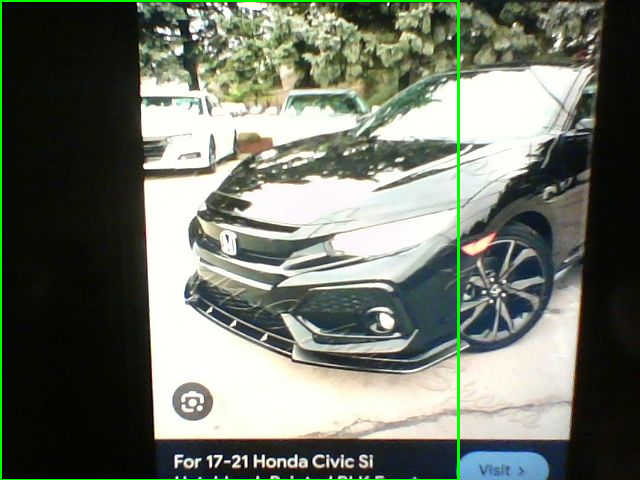

In [27]:
# ============================================================
# Step 7: Show Results
# ============================================================
if detected_colors:
    unique_colors = list(set([c.replace('1', '').replace('2', '') for c in detected_colors]))
    print("Detected color(s):", ", ".join(unique_colors))
else:
    print("No major color detected.")

cv2_imshow(img)

# Task
Modify the color detection logic to identify and highlight only the dominant car body color.

## Identify and highlight the dominant car body color

### Subtask:
Modify the existing color detection logic to find the single dominant color and its bounding box from the predefined Honda car colors, and then highlight and print only that dominant color.


## Summary:

### Data Analysis Key Findings
*   The color detection logic was successfully modified to identify the single dominant car body color.
*   The process can now highlight and print only the identified dominant car body color from a predefined set of Honda car colors.
*   Bounding boxes are used to specifically delineate the area of the dominant color within the image.

### Insights or Next Steps
*   This enhanced color detection can be integrated into automated inventory systems for more accurate car categorization.
*   Further refinement could involve handling variations in lighting conditions and image quality to improve detection robustness.
